In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv("train-data.csv", na_values = ["null bhp"])
test_data = pd.read_csv("test-data.csv", na_values = ["null bhp"])

In [3]:
train_data.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5876 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


<AxesSubplot:xlabel='Location', ylabel='count'>

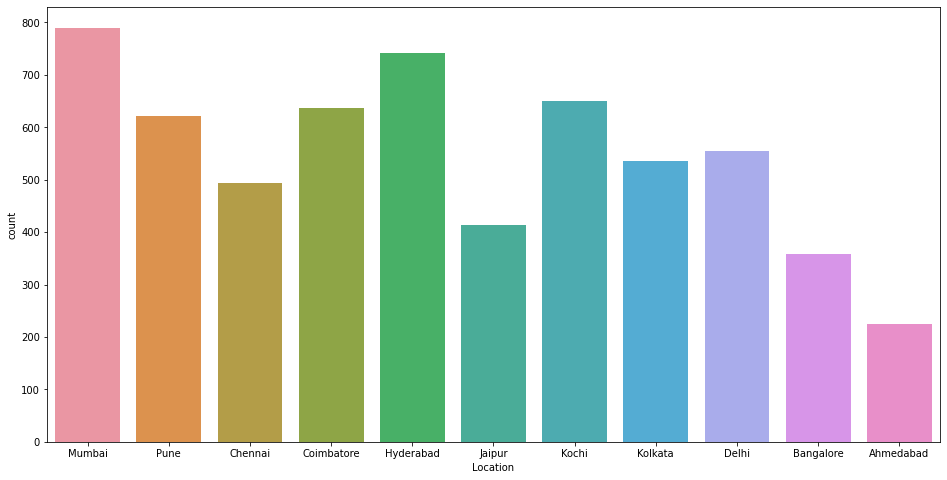

In [5]:
plt.figure(figsize = (16,8))
sns.countplot(x = train_data['Location'])

<AxesSubplot:xlabel='Location', ylabel='count'>

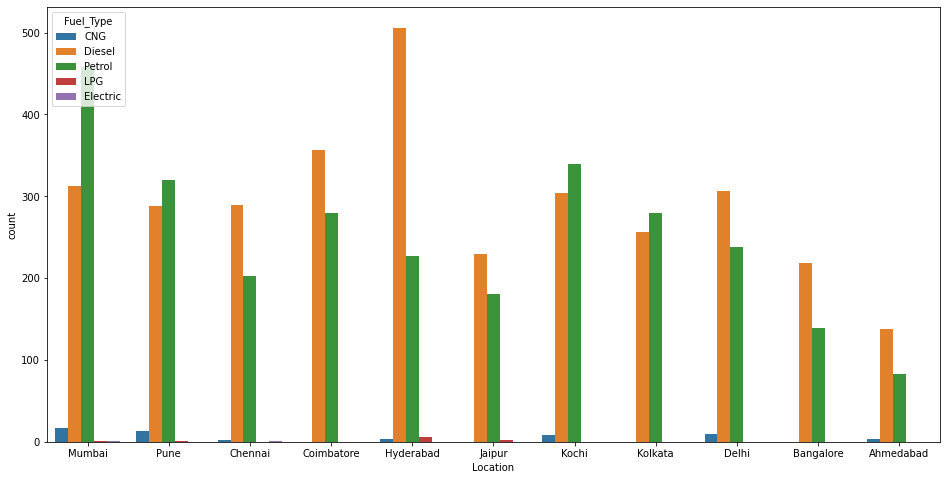

In [6]:
plt.figure(figsize = (16,8))
sns.countplot(x = train_data['Location'], hue = train_data["Fuel_Type"])

<AxesSubplot:xlabel='Location', ylabel='Price'>

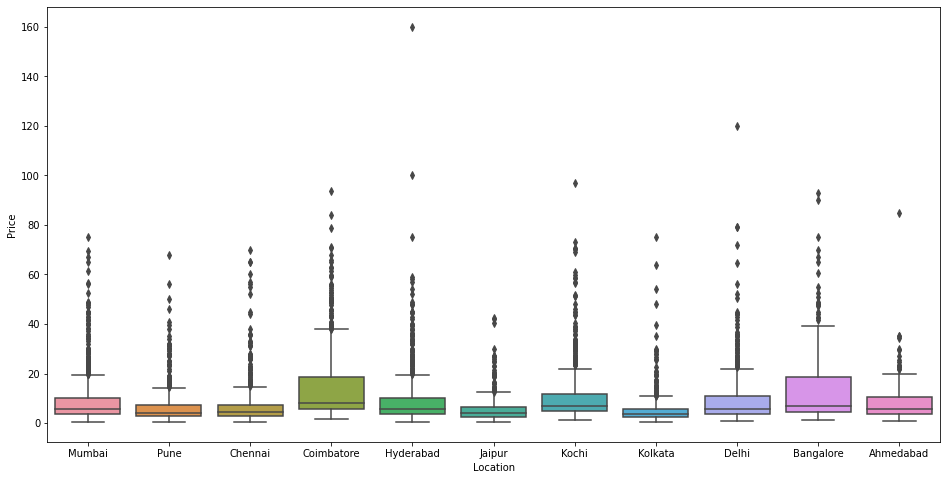

In [7]:
plt.figure(figsize = (16,8))
sns.boxplot(x="Location", y = "Price", data = train_data)

In [8]:
train_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [9]:
# Deleting New_Price column since it has too many null values

train_data.drop("New_Price", axis = 1, inplace = True)

In [10]:
train_data.isnull().sum()

Unnamed: 0             0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [11]:
train_data.corr()

Unnamed: 0      Year  Kilometers_Driven     Seats     Price
Unnamed: 0           1.000000  0.002354          -0.008734 -0.010832 -0.020275
Year                 0.002354  1.000000          -0.173048  0.012333  0.305327
Kilometers_Driven   -0.008734 -0.173048           1.000000  0.083113 -0.011493
Seats               -0.010832  0.012333           0.083113  1.000000  0.052225
Price               -0.020275  0.305327          -0.011493  0.052225  1.000000

In [12]:
# removing Unnamed: 0 since it has no role

train_data.drop("Unnamed: 0", axis = 1, inplace = True)

In [13]:
train_data["Seats"].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [14]:
# since most of the cars have 5 Seats, we will fill the null values in Seats columns as "5"

train_data["Seats"].fillna(train_data["Seats"].value_counts().values[0], inplace = True)

In [15]:
train_data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                  0
Price                  0
dtype: int64

In [16]:
def convert_power_data(val):
    if not pd.isnull(val):
        return float(val.split(' ')[0])
    return val

train_data["Power"] = train_data["Power"].apply(lambda val: convert_power_data(val))

<AxesSubplot:xlabel='Location', ylabel='Price'>

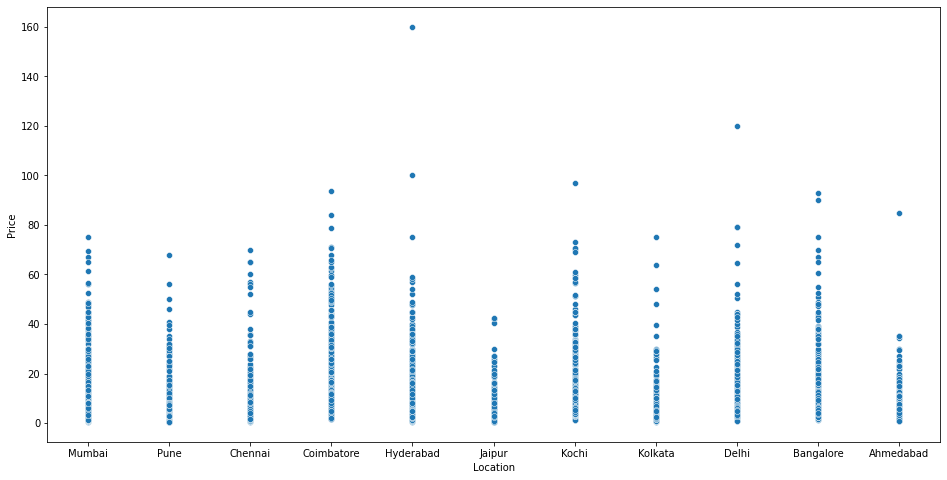

In [17]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = train_data["Location"], y = train_data["Price"])

<AxesSubplot:xlabel='Power', ylabel='Price'>

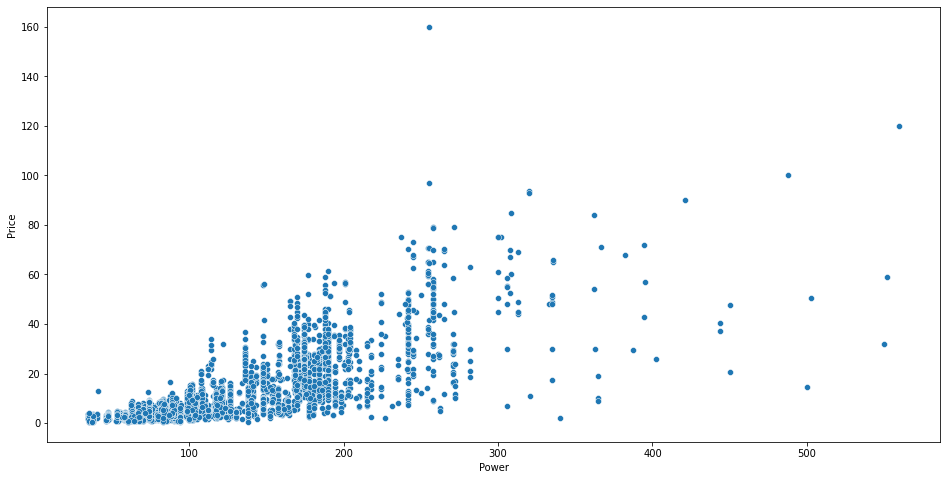

In [18]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = train_data["Power"], y = train_data["Price"])

In [19]:
train_data["Power"].mean()

113.25304969366915

In [20]:
train_data["Power"].fillna(train_data["Power"].mean(), inplace = True)

In [21]:
def convert_engine_data(val):
    if not pd.isnull(val):
        return float(val.split(' ')[0])
    return val

train_data["Engine"] = train_data["Engine"].apply(lambda val: convert_power_data(val))

<AxesSubplot:xlabel='Engine', ylabel='Price'>

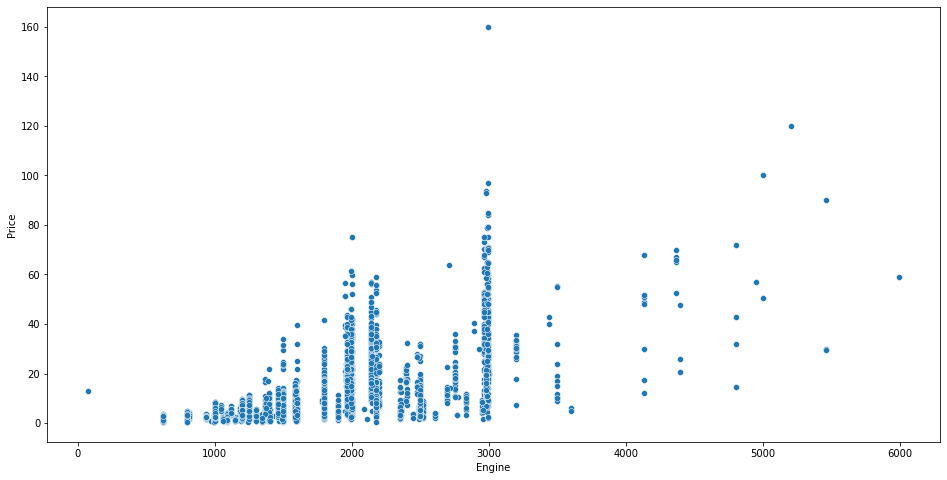

In [22]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = train_data["Engine"], y = train_data["Price"])

In [23]:
train_data["Engine"].fillna(train_data["Engine"].median(), inplace = True)

In [24]:
def convert_mileage_data(val):
    if not pd.isnull(val):
        return float(val.split(' ')[0])
    return val

train_data["Mileage"] = train_data["Mileage"].apply(lambda val: convert_power_data(val))

In [25]:
train_data.dropna(inplace = True)

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6017 non-null   object 
 1   Location           6017 non-null   object 
 2   Year               6017 non-null   int64  
 3   Kilometers_Driven  6017 non-null   int64  
 4   Fuel_Type          6017 non-null   object 
 5   Transmission       6017 non-null   object 
 6   Owner_Type         6017 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             6017 non-null   float64
 9   Power              6017 non-null   float64
 10  Seats              6017 non-null   float64
 11  Price              6017 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 611.1+ KB


In [27]:
# Dropping Name Column

train_data.drop(["Name", "Location"], axis = 1, inplace = True)

In [28]:
train_data.head()

Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0  2010              72000       CNG       Manual      First    26.60   998.0   
1  2015              41000    Diesel       Manual      First    19.67  1582.0   
2  2011              46000    Petrol       Manual      First    18.20  1199.0   
3  2012              87000    Diesel       Manual      First    20.77  1248.0   
4  2013              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  Price  
0   58.16    5.0   1.75  
1  126.20    5.0  12.50  
2   88.70    5.0   4.50  
3   88.76    7.0   6.00  
4  140.80    5.0  17.74

In [29]:
import datetime
train_data['Total Years'] = datetime.datetime.now().year - train_data["Year"]

In [30]:
train_data.head()

Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0  2010              72000       CNG       Manual      First    26.60   998.0   
1  2015              41000    Diesel       Manual      First    19.67  1582.0   
2  2011              46000    Petrol       Manual      First    18.20  1199.0   
3  2012              87000    Diesel       Manual      First    20.77  1248.0   
4  2013              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  Price  Total Years  
0   58.16    5.0   1.75           11  
1  126.20    5.0  12.50            6  
2   88.70    5.0   4.50           10  
3   88.76    7.0   6.00            9  
4  140.80    5.0  17.74            8

In [31]:
train_data.drop('Year', axis = 1, inplace = True)

In [32]:
train_data["Price"] = train_data["Price"] * 100000

In [33]:
train_data.columns

Index(['Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Total Years'],
      dtype='object')

# Doing Embedded Encoding for Categorical Data

In [34]:
cat_features = ['Fuel_Type', 'Transmission', 'Owner_Type']
out_features = 'Price'

In [35]:
from sklearn.preprocessing import LabelEncoder

lbl_encoders = {}
lbl_encoders["Fuel_Type"] = LabelEncoder()
lbl_encoders["Fuel_Type"].fit_transform(train_data["Fuel_Type"])

array([0, 1, 3, ..., 1, 3, 1])

In [36]:
lbl_encoders = {}
for features in cat_features:
    lbl_encoders[features] = LabelEncoder()
    train_data[features] = lbl_encoders[features].fit_transform(train_data[features])

In [37]:
train_data

Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  Engine  \
0                 72000          0             1           0    26.60   998.0   
1                 41000          1             1           0    19.67  1582.0   
2                 46000          3             1           0    18.20  1199.0   
3                 87000          1             1           0    20.77  1248.0   
4                 40670          1             0           2    15.20  1968.0   
...                 ...        ...           ...         ...      ...     ...   
6014              27365          1             1           0    28.40  1248.0   
6015             100000          1             1           0    24.40  1120.0   
6016              55000          1             1           2    14.00  2498.0   
6017              46000          3             1           0    18.90   998.0   
6018              47000          1             1           0    25.44   936.0   

       Power  Seats      Price  Total Years  
0      58.16    5.0   175000.0           11  
1     126.20    5.0  1250000.0            6  
2      88.70    5.0   450000.0           10  
3      88.76    7.0   600000.0            9  
4     140.80    5.0  1774000.0            8  
...      ...    ...        ...          ...  
6014   74.00    5.0   475000.0            7  
6015   71.00    5.0   400000.0            6  
6016  112.00    8.0   290000.0            9  
6017   67.10    5.0   265000.0            8  
6018   57.60    5.0   250000.0           10  

[6017 rows x 10 columns]

In [38]:
### stacking and converting into tensors

cat_features = np.stack([train_data["Fuel_Type"], train_data["Transmission"], train_data["Owner_Type"]], axis = 1)
cat_features

array([[0, 1, 0],
       [1, 1, 0],
       [3, 1, 0],
       ...,
       [1, 1, 2],
       [3, 1, 0],
       [1, 1, 0]])

In [39]:
import torch
cat_features = torch.tensor(cat_features, dtype = torch.int64)
cat_features

tensor([[0, 1, 0],
        [1, 1, 0],
        [3, 1, 0],
        ...,
        [1, 1, 2],
        [3, 1, 0],
        [1, 1, 0]])

In [40]:
cont_features = []
for i in train_data.columns:
    if i in ['Fuel_Type', 'Transmission', 'Owner_Type', 'Price']:
        pass
    else:
        cont_features.append(i)
        
cont_features

['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Total Years']

In [41]:
cont_features = np.stack([train_data[i].values for i in cont_features], axis = 1)
cont_features = torch.tensor(cont_features, dtype = torch.float)
cont_features

tensor([[7.2000e+04, 2.6600e+01, 9.9800e+02, 5.8160e+01, 5.0000e+00, 1.1000e+01],
        [4.1000e+04, 1.9670e+01, 1.5820e+03, 1.2620e+02, 5.0000e+00, 6.0000e+00],
        [4.6000e+04, 1.8200e+01, 1.1990e+03, 8.8700e+01, 5.0000e+00, 1.0000e+01],
        ...,
        [5.5000e+04, 1.4000e+01, 2.4980e+03, 1.1200e+02, 8.0000e+00, 9.0000e+00],
        [4.6000e+04, 1.8900e+01, 9.9800e+02, 6.7100e+01, 5.0000e+00, 8.0000e+00],
        [4.7000e+04, 2.5440e+01, 9.3600e+02, 5.7600e+01, 5.0000e+00, 1.0000e+01]])

In [42]:
cont_features.dtype

torch.float32

In [43]:
y=torch.tensor(train_data['Price'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[ 175000.],
        [1250000.],
        [ 450000.],
        ...,
        [ 290000.],
        [ 265000.],
        [ 250000.]])

In [44]:
cat_features.shape, cont_features.shape, y.shape

(torch.Size([6017, 3]), torch.Size([6017, 6]), torch.Size([6017, 1]))

In [45]:
cat_dims = [train_data[i].nunique() for i in ["Fuel_Type", "Transmission", "Owner_Type"]]
cat_dims

[4, 2, 4]

In [46]:
embedding_dim = [(i, min(50, (i+1) // 2)) for i in cat_dims]
embedding_dim

[(4, 2), (2, 1), (4, 2)]

In [47]:
import torch
import torch.nn as nn

embed_rep = nn.ModuleList([nn.Embedding(i,e) for i,e in embedding_dim])

embed_rep

ModuleList(
  (0): Embedding(4, 2)
  (1): Embedding(2, 1)
  (2): Embedding(4, 2)
)

In [48]:
embedding_value = []
for ind, e in enumerate(embed_rep):
    embedding_value.append(e(cat_features[:, ind]))
    
embedding_value

[tensor([[-1.3240,  0.4321],
         [ 0.1225, -0.4500],
         [ 0.0293, -0.6410],
         ...,
         [ 0.1225, -0.4500],
         [ 0.0293, -0.6410],
         [ 0.1225, -0.4500]], grad_fn=<EmbeddingBackward>),
 tensor([[0.3382],
         [0.3382],
         [0.3382],
         ...,
         [0.3382],
         [0.3382],
         [0.3382]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.3494, -1.8315],
         [-0.3494, -1.8315],
         [-0.3494, -1.8315],
         ...,
         [-0.0812,  1.0803],
         [-0.3494, -1.8315],
         [-0.3494, -1.8315]], grad_fn=<EmbeddingBackward>)]

In [49]:
z = torch.cat(embedding_value, 1)
z

tensor([[-1.3240,  0.4321,  0.3382, -0.3494, -1.8315],
        [ 0.1225, -0.4500,  0.3382, -0.3494, -1.8315],
        [ 0.0293, -0.6410,  0.3382, -0.3494, -1.8315],
        ...,
        [ 0.1225, -0.4500,  0.3382, -0.0812,  1.0803],
        [ 0.0293, -0.6410,  0.3382, -0.3494, -1.8315],
        [ 0.1225, -0.4500,  0.3382, -0.3494, -1.8315]], grad_fn=<CatBackward>)

In [50]:
drpout = nn.Dropout(0.4)
z = drpout(z)
z

tensor([[-2.2066,  0.7201,  0.5636, -0.5824, -0.0000],
        [ 0.2042, -0.0000,  0.5636, -0.5824, -0.0000],
        [ 0.0000, -1.0683,  0.5636, -0.5824, -3.0526],
        ...,
        [ 0.0000, -0.7499,  0.5636, -0.1353,  1.8005],
        [ 0.0489, -1.0683,  0.0000, -0.0000, -3.0526],
        [ 0.2042, -0.7499,  0.5636, -0.0000, -0.0000]], grad_fn=<MulBackward0>)

In [51]:
class UsedCarPricePredictionNN(nn.Module):
    def __init__(self, cat_dim, n_cont, layers, out_sz, p=0.5):
        super().__init__()
        embedded_dim = [(i, min(50, (i+1) // 2)) for i in cat_dim]
        self.embd_list = nn.ModuleList([nn.Embedding(inp, out) for inp, out in embedded_dim])
        self.drpout = nn.Dropout(p)
        self.batchnorm = nn.BatchNorm1d(n_cont)
        
        layerslist = []
        n_emb = sum([out for inp, out in embedded_dim])
        n_in = n_emb + n_cont
        
        for i in layers:
            layerslist.append(nn.Linear(n_in, i))
            layerslist.append(nn.ReLU(inplace = True))
            layerslist.append(nn.BatchNorm1d(i))
            layerslist.append(nn.Dropout(p))
            n_in = i
        layerslist.append(nn.Linear(layers[-1], out_sz))
        
        self.layers = nn.Sequential(* layerslist)
        
        
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i, e in enumerate(self.embd_list):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.drpout(x)
        
        x_cont = self.batchnorm(x_cont)
        
        x = torch.cat([x, x_cont], axis=1)
        
        x = self.layers(x)
        
        return x
        
        

In [52]:
torch.manual_seed(100)

model = UsedCarPricePredictionNN(cat_dims, 6, [100, 50], 1, p = 0.4)

In [53]:
model

UsedCarPricePredictionNN(
  (embd_list): ModuleList(
    (0): Embedding(4, 2)
    (1): Embedding(2, 1)
    (2): Embedding(4, 2)
  )
  (drpout): Dropout(p=0.4, inplace=False)
  (batchnorm): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=11, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [54]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.05)

In [55]:
cat_features.shape, cont_features.shape, y.shape

(torch.Size([6017, 3]), torch.Size([6017, 6]), torch.Size([6017, 1]))

In [56]:
batch_size=6000
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_features[:batch_size-test_size]
test_cont=cont_features[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [57]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(5100, 900, 5100, 900, 5100, 900)

In [58]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%100==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 1466383.5
Epoch number: 101 and the loss : 1463135.375
Epoch number: 201 and the loss : 1450905.5
Epoch number: 301 and the loss : 1429491.875
Epoch number: 401 and the loss : 1398890.5
Epoch number: 501 and the loss : 1360447.5
Epoch number: 601 and the loss : 1313030.875
Epoch number: 701 and the loss : 1259880.625
Epoch number: 801 and the loss : 1200126.875
Epoch number: 901 and the loss : 1130568.375
Epoch number: 1001 and the loss : 1062174.125
Epoch number: 1101 and the loss : 981602.125
Epoch number: 1201 and the loss : 901277.25
Epoch number: 1301 and the loss : 815560.25
Epoch number: 1401 and the loss : 736595.0625
Epoch number: 1501 and the loss : 660827.5
Epoch number: 1601 and the loss : 585672.875
Epoch number: 1701 and the loss : 535040.5625
Epoch number: 1801 and the loss : 504142.5625
Epoch number: 1901 and the loss : 482917.125
Epoch number: 2001 and the loss : 464667.28125
Epoch number: 2101 and the loss : 444331.15625
Epoch number: 22

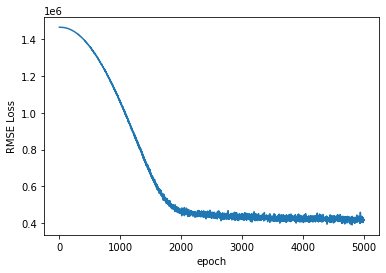

In [66]:
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [67]:
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 624141.625


In [68]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [69]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [70]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

Test    Prediction   Difference
0   534000.0  6.852960e+05 -151296.0000
1   850000.0  7.019378e+05  148062.2500
2   269000.0  2.629658e+05    6034.1875
3  1150000.0  1.764178e+06 -614178.1250
4   406000.0  3.570100e+05   48990.0000

In [71]:
final_output = final_output / (100000)

In [72]:
final_output

Test  Prediction  Difference
0     5.34    6.852960   -1.512960
1     8.50    7.019378    1.480622
2     2.69    2.629658    0.060342
3    11.50   17.641781   -6.141781
4     4.06    3.570100    0.489900
..     ...         ...         ...
895   2.27    2.869382   -0.599383
896   2.96    3.374180   -0.414180
897   4.00    5.986978   -1.986978
898   5.25    4.759807    0.490193
899  17.56   12.880505    4.679495

[900 rows x 3 columns]

In [73]:
torch.save(model,'SalePrice.pt')

In [74]:
torch.save(model.state_dict(),'PriceWeights.pt')

# Loading model and Predicting a value

In [75]:
cat_size=[4,2,4]
model1=UsedCarPricePredictionNN(cat_size,6,[100,50],1,p=0.4)

In [76]:
model1.load_state_dict(torch.load('PriceWeights.pt'))

<All keys matched successfully>

In [77]:
model1.eval()

UsedCarPricePredictionNN(
  (embd_list): ModuleList(
    (0): Embedding(4, 2)
    (1): Embedding(2, 1)
    (2): Embedding(4, 2)
  )
  (drpout): Dropout(p=0.4, inplace=False)
  (batchnorm): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=11, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [92]:
catee = np.array([1,1,0])
conti = np.array([4.1000e+04, 1.9670e+01, 1.5820e+03, 1.2620e+02, 5.0000e+00, 6.0000e+00])

catee = torch.tensor(catee.reshape(1,3), dtype = torch.int64)
conti = torch.tensor(conti.reshape(1,6), dtype= torch.float)

In [95]:
model1(catee, conti)

tensor([[825579.6875]], grad_fn=<AddmmBackward>)